# Networks

In 2020, it is difficult to find someone who doesn't have some idea of what a network is because the internet and social media platforms have brought them so clearly into focus. When I say network people immediately think of:

<img src='https://i0.wp.com/www.euroscientist.com/wp-content/uploads/2019/06/cropped-social-media-3846597_1280-1.png?resize=672%2C372&ssl=1' width='400px'>

and the connections that it brings worldwide:

<img src='https://www.datacenterknowledge.com/sites/datacenterknowledge.com/files/styles/article_featured_retina/public/wp-content/uploads/2011/01/fb-audience-map-470.jpg?itok=VxFA2oCG' width='400px'>

But there is more to networks than that, they can encapsulate our ability to move physically:

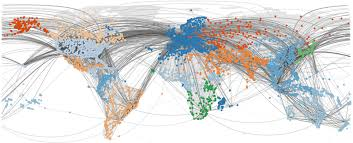

and even the words we use to describe the world:

<img src='https://upload.wikimedia.org/wikipedia/commons/9/91/Khcoder_net_e.png' width='400px'>

And of course we can perform combinations of these two:

<img src='https://networkofthrones.files.wordpress.com/2019/08/got-s8.png?w=1024' width='400px'>

Full-stop. A network graph is simply a mathematical model that is composed of vertices and edges, $G = (V, E)$

<img src='../images/basic_network.png'>

This mathematical model facilitates the analysis of topology and interactions between entites. The first usage of a network was by Euler in the 1700s to solve a long-standing riddle concerning the [traversal of bridges in Konigsberg](https://en.wikipedia.org/wiki/Seven_Bridges_of_Königsberg). His insight may seem extremely simple, it involved the reduction of a physical reality to a mathematical object

<img src='../images/konigsberg_bridge.png'>

but it allowed for a mathematical proof to the riddle that was not easily achieved with other approaches.

# Analyzing networks with Python

There are primarily two packages you can use when you want to undertake network analysis. The first package is **NetworkX**, which has been under development for almost a decade now. The second is **graph-tool**, which is younger. graph-tool is significantly faster than NetworkX because most of the package is implemented in C++. However, this makes installation of the package more difficult.

At the start of class we installed `graph-tool` and given the speed advantages and built-in statistical modelling we will use it in class.

In [ ]:
#Colab USAGE!!
# !apt install libcairo2-dev libgif-dev libjpeg-dev 
# !pip install pycairo
# !echo "deb http://downloads.skewed.de/apt bionic main" >> /etc/apt/sources.list
# !apt-key adv --keyserver keys.openpgp.org --recv-key 612DEFB798507F25
# !apt-get update
# !apt-get install python3-graph-tool

In [ ]:
from graph_tool.all import *

And creating a graph is simple, we just ask for a graph.

In [ ]:
g = Graph()
g

By default `Graph()` will create an empty directed graph object. If we want to add our nodes, we do that by asking it to add a vertex

In [ ]:
v1 = g.add_vertex()
v2 = g.add_vertex()
v2

In [ ]:
[x for x in g.vertices()]

You can see that the added vertices are given an index and added to the graph.

In [ ]:
graph_draw(g, vertex_text=g.vertex_index)

And if we draw the graph, we can see that it's all there but basic -- two simple disconnected vertices. We need to add the edges between vertices in order to actually connect it.

In [ ]:
e1 = g.add_edge(v1, v2)
graph_draw(g, vertex_text=g.vertex_index)

Now we see the connection between vertex `0` and `1`, with an edge (arrow) pointing from vertex `0` to vertex `1`.

This pointed arrow denotes **directionality**, it says that information is passed from `v1`  to `v2`, but not vice-versa. If you wanted this relationship to be bi-directional, you would need to add a second edge that says that the **source** of the connection is `v2` and the **target** of that information is `v1`.

In [ ]:
e1 = g.add_edge(v2, v1)
graph_draw(g, vertex_text=g.vertex_index)

and now we see two edges, with one originating from each one of the nodes and this will denote that `v1` sends to `v2` and vice versa.

## Question

* What are the potential types of connections/transactions where it should be bidirectional?
* Simply directional? 
* Does direction always matter?

# Theoretical graphs and construction

## Undirected vs. Directed

An **undirected** network means that an edge has no direction, in our network an edge means that an edge goes for both of the nodes.

If we wanted to examine a network where we looked at who initiated a conversation with whom during a day, we would want a **directed** network. **By default** graph-tool constructs a directed network. 

<img src="https://blogs.sas.com/content/graphicallyspeaking/files/2016/05/Network_Icon_Single__15_B.png" width="400px"></img>

In a directed network an edge is displayed with an arrow and it shows the direction of the edge and it is not symmetric, **unlike** an undirected network. This means that if:
* Bob starts a conversation with Alice, then we would draw an edge from Bob to Alice with the arrow pointed to Alice
* Later that day Alice started a conversation with Bob, we would draw another edge from Alice to Bob, with the arrow pointed at Bob

If we want an undirected network, we can specify that at the time of graph creation

In [ ]:
ug = Graph(directed=False)
uv0 = ug.add_vertex()
uv1 = ug.add_vertex()
ue0 = ug.add_edge(uv0, uv1)
graph_draw(ug, vertex_text=ug.vertex_index)

## Unweighted vs. Weighted

An **unweighted** network has edges that are effectively binary, either there exists an edge between two nodes or there does not exist an edge. All edges that exist are counted the same.  This type of network makes sense for friendship, since two people are either friends or they are not. 

If we think about our conversation network though, we would want to know the **number** of times that two individuals interact --- especially because it is likely that all of the individuals would talk to each other during the course of a day. This means that the presence or absence of an edge doesn't matter because it is a **fully connected** network. We would add the **number** of conversations, more typically known as the **weight** of an edge, to represent the strength of the connection between two nodes. In a graph we typically show weights by making the width of an edge larger.
<img src="https://humannaturegroup.files.wordpress.com/2009/12/map.png" width="400px"></img>

In [ ]:
ug = Graph(directed=False)
# Create the edge weight property
eweight = ug.new_ep('double')
# g.edge_properties['weight'] = edge_weights
ug.add_edge_list([(0, 1, 2), (1, 2, 10)], eprops=[eweight])
#Draw the graph
graph_draw(ug, vertex_text=ug.vertex_index, edge_pen_width=eweight)
eweight.fa

# Summing up the basics

So far we have covered creating a graph, creating a few nodes and edges, and graphing it (which actually looks rather nice!). There's a little bit of work we have to do to have properties for edges and vertices (with the definition of the data type in C++ data struct language), but that's all in the name of speed. 

For reinforcement let's create a simple communication network for four co-workers.

In [ ]:
import itertools
#Our four individuals
individuals = ['Alice', 'Bob', 'Carol', 'David']
edge_list = [x for x in itertools.combinations(individuals, 2)]

G = Graph()
#Add the edges, hashed tells graph-tool to infer the index numbers
vmap = G.add_edge_list(edge_list, hashed=True)
graph_draw(G, vertex_text=vmap)

We can remove a node if need be from the graph

In [ ]:
G.remove_vertex(0)
graph_draw(G, vertex_text = vmap)

And check all our nodes now:

In [ ]:
[x for x in G.vertices()]

Importantly all of our vertices are numbers not names -- why? **Discussion** of old times

But with a vertex we can perform many operations to extract data from the graph.

In [ ]:
tv = [x for x in G.vertices()][0]
#Get edges:
print('edges for vertex 0')
for x in tv.all_edges():
    print(x)
print('--')
#Or get all neighbors
print('neighbors for vertex 0')
for x in tv.all_neighbors():
    print(x)
print('--')
#Or just count neighbors
print(f'vertex 0 has {tv.in_degree() + tv.out_degree()} neighbors')
#Weren't expecting that were you??

Of course we don't have to iterate through this manner to access these attributes

In [ ]:
print(f'Vertex 1 has in-degree {G.vertex(1).in_degree()} and out-degree {G.vertex(1).out_degree()}')

# Basic network statistics 

**Degree** - the number of connections you have to other vertices. In-degree is the number of incoming links and out-degree is the number of outgoing links. Total degree is the sum of these two, in an unweighted network total degree is equal to the number of network neighbors.

**Centrality** - whoo, well there's a number of these. Effectively a measure of how 'central' a vertex is in the network. There are many mathematical formulations which are different interpretations of what the word 'central' means. Requires the entire context of the network to calculate.

**Clustering** - How tightly closed the connections are in your local sphere, i.e. are your friends friends?

In [ ]:
#Reset the network
G = Graph(directed=False)
#Add the edges, hashed tells graph-tool to infer the index numbers
vmap = G.add_edge_list(edge_list, hashed=True)

In [ ]:
#calculate betweenness centrality
bet_vmap, bet_emap = betweenness(G)
bet_vmap[3]

In [ ]:
#Calculate clustering coefficient
clust_vmap = local_clustering(G)
clust_vmap[2]

Really boring because the network isn't bit enough!

So let's step up our game here and transition to a larger network. For this we'll use the divvy bikes network that's in the data folder.

# Divvy network

The `divvy_network.json` has the divvy stations as vertices and the edges are a bike being checked out at one station and docked at another.

`graph-tool` doesn't support json as a network format though, so we'll need to do a transformation using NetworkX.

In [ ]:
import networkx as nx
from networkx.readwrite import json_graph
import json

data = json.load(open('../data/divvy_network.json'))
G = json_graph.node_link_graph(data)
#Need to sanitize out all the information
H = nx.Graph()
H.add_edges_from(G.edges())
#And graph_tool can read graph_ml
nx.readwrite.write_gml(H, '../data/divvy_network.gml')

If we write out a graph in the gml format (which requires stripping properties), then we can read it in.

In [ ]:
!head ../data/divvy_network.gml

In [ ]:
divvyg = load_graph('../data/divvy_network.gml')
graph_draw(divvyg)

Pretty!

Understanding non-trivial networks is difficult by plotting the network because of the large number of nodes and edges that would overlap. For this reason we typically look at distributions of network statistics, such as the distribution of degrees.

In [ ]:
#Exercise
# Plotting the distribution of degrees



So what we can see is that there is a slight peak near the larger side of the distribution, this means that there are a number of Divvy stations that see a large number of trips. 

Since the Divvy Trip network is a transportation network (it shows movement from one station to another) we can look at betweenness centrality. Betweenness centrality for a node `i` is the sum of the fraction of shortest paths that pass through `i`.

In [ ]:
# Exercise
# Distribution of betweenness centrality


Now we should look and see if this network is assortative. That means, what is my degree versus my neighbor's degree? Am I typically connected to neighbors that have the same degree as me or not?

In [ ]:
#Exercise


The network is assortative, nodes with a high-degree have neighbors that also have a high degree. 

### Why is that? When would the converse be true?

We can and should check this though. Implement a function to calculate the distance between two stations with the [Haversine distance](https://en.wikipedia.org/wiki/Haversine_formula)

In [ ]:
#Exercise


Interesting, this appears to be a pretty small distance. But to make sure we should calculate and plot the differences between distance between neighbors and distance between non-neighbors

In [ ]:
#Exercise


In [ ]:
ax = plt.subplot(111)
ax.boxplot([avg_neighbor_distances, avg_non_neighbor_distances])
plt.setp(ax, xticklabels=['Neighbor', 'Non-Neighbor'])
ax.set_xlim(0.5,2.5)
ax.set_ylabel('Distance')
plt.tight_layout()

Now let's test whether these two distributions from the same distribution or not, using the Kolmogorov-Smirnov test.

**Are these two distributions the same or not?**

In [ ]:
from scipy.stats import ks_2samp

D, p = ks_2samp(avg_neighbor_distances, avg_non_neighbor_distances)
print( p )

# Network Path Traversal

Another important part is traversing a network. What are two easy ways that this could be done?

**answer is....**

Breadth-first or depth-first

Perfect!

Now let's implement breadth first of these algorithms

so if we have a tree like:

`
 -> My tree starting from Z
     Z
  |     |
  B     C
|  |  |  |
D  E  F  G
`

The answer should be:
[B, C, D, E, F, G]

In [ ]:
#Exercise


But there's a simpler way to do this, since it's a built in method of networkx